<center>

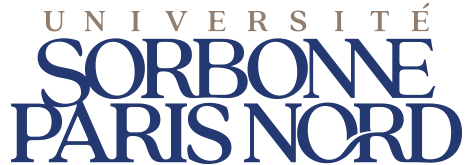

</center>

<h1><center><strong style="color: #293358">NoSQL<br/> BUT 3 - IUT Villetaneuse <br/> Introduction à MongoDB</strong></center></h1>

<center>
<h3 style="color: #8b7d6d"><a href="https://gguibon.github.io/">Gaël Guibon</a></h3>
<email>gael.guibon@sorbonne-paris-nord.fr</email>
<br/>
Year 2025-2026

Original Content

Licenced under Affero GNU3
</center>

## <strong style="color: #8b7d6d">Usage de la machine virtuelle</strong>

1. Téléchargez la VM ici : https://e.pcloud.link/publink/show?code=XZ3dvxZh0fEzIaCmqF9HHRP346u0S0MY4lk
2. Importez la dans Virtual Box
3. Connectez-vous avec l'id `uspn`et le mot de passe `uspn`
4. Enjoy !


Cette machine virtuelle est déjà configurée pour Redis et il vous suffit de lancer les quelques commandes de la section suivante pour y installer MongoDB.

## <strong style="color: #8b7d6d">Installation de mongodb</strong>

### Installer MongoDB par docker 
1. Télécharger Docker Desktop et l'installer: https://docs.docker.com/desktop/
2. Lancer Docker Desktop (cela lance le deamon docker en service de fond - background service)
3. Ouvrir le terminal
4. Taper cette commande dans le terminal
```
docker run --name mongodb -d -p 27017:27017 mongodb/mongodb-community-server:latest
```
Cela télécharge l'image docker de mongdb et crée un container au nom de `mongodb`. Le serveur mongodb écoutera le port 27017
5. Vérifier les containers docker en cours d'exécution en tapant la commande suivante dans le terminal
```
docker ps
```
6. Vérifier les containers dockers disponibles en tapant la commande suivante dans le terminal
```
docker ps -a
```
`-a` signifie `all`
7. Si le container `mongodb` n'est pas en cours d'exécution, vous pouvez le lancer en tapant dans le terminal
```
docker start mongodb
```
8. Vous pouvez arrêter le container en tapant dans le terminal
```
docker stop mongodb
```
9. Si vous souhaitez supprimer le container, tapez dans le terminal
```
docker stop mongodb && docker rm mongodb
```
10. Installez l'interface graphique de MongoDB, nommée Mongo Compass : https://www.mongodb.com/products/tools/compass 

### Utiliser MongoDB via docker

#### Par terminal Mongo Shell (mongosh)
Comme la commande `mongosh`est diponible que dans le container nous pouvons la lancer comme ceci :
```
docker exec -it mongodb mongosh
```
Ce qui signgifie `exec`(executer) `-it` (interactive terminal) `mongodb` (le nom du container pour lancer le terminal interactif) `mongosh` (dans ce terminal interactif je lance la commande `mongosh`)

### Ubuntu 24.04 LTS et installation native

L'installation de mongodb, de pymongo et de mongo compass est déjà faite dans la VM 😉

À toute fin utile, voici les commandes pour l'installation sous Ubuntu :

In [5]:
! sudo apt update ; sudo apt-get install gnupg curl
! curl -fsSL https://www.mongodb.org/static/pgp/server-8.0.asc | sudo gpg -o /usr/share/keyrings/mongodb-server-8.0.gpg --dearmor
! echo "deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-8.0.gpg ] https://repo.mongodb.org/apt/ubuntu noble/mongodb-org/8.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-8.0.list
! sudo apt update ; sudo apt-get install -y mongodb-org wget

[sudo] Mot de passe de uspn : 
[sudo] Mot de passe de uspn : 

In [ ]:
! pip install pymongo pandas --break-system-packages

In [ ]:
! wget https://downloads.mongodb.com/compass/mongodb-compass_1.44.4_amd64.deb
! sudo apt install ./mongodb-compass_1.44.4_amd64.deb

In [ ]:
! wget https://gitlab.com/gguibon/uspn-storage/-/raw/main/pokemons.json

### Windows / MacOS

1. Téléchargez MongoDB Community Edition : https://www.mongodb.com/try/download/community
2. Installez le en mettant tout par défaut
3. Téléchargez Mongo Compass : https://www.mongodb.com/products/tools/compass 
4. Installez le.
5. Installez `pandas`, `pymongo` et `wget` : 

In [ ]:
! pip install pymongo pandas wget

6. Téléchargez la base des pokemons : 

In [ ]:
import wget
url = "https://gitlab.com/gguibon/uspn-storage/-/raw/main/pokemons.json"
wget.download(url)

## <strong style="color: #8b7d6d">Lancement du service Mongodb (`mongod` pour installation native)</strong>

### Ubuntu 24.04 LTS

In [ ]:
! sudo service mongod start
! sudo service mongod status

### Windows 10 / 11

Lancez une invite de commande (ou un Windows Terminal) en administrateur, puis exécutez :

```sh
net start MongoDB
```

# <strong style="color: #8b7d6d">CRUD (Create Read Update Delete) en MongoDB</strong>

In [1]:
import pymongo, json
import pandas as pd

#### 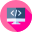 **TODO!**

Ouvrez le fichier JSON dans Pandas et affichez le en format String.

💡Astuce :
- Voici une introduction officielle de 10 minutes pour Pandas : https://pandas.pydata.org/docs/user_guide/10min.html 

In [2]:
df = pd.read_json("pokemons.json")


#### 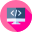 **TODO!**

Affichez le dataframe réorienté en "records", donc avec une orientation par rangées de la table

In [3]:
records = df.to_dict(orient = "records")

print(records[12])

{'Number': 13, 'Name': 'Weedle', 'Type_1': 'Bug', 'Type_2': 'Poison', 'Total': 195, 'HP': 40, 'Attack': 35, 'Defense': 30, 'Sp_Atk': 20, 'Sp_Def': 20, 'Speed': 50, 'Generation': 1, 'isLegendary': False, 'Color': 'Brown', 'hasGender': True, 'Pr_Male': 0.5, 'Egg_Group_1': 'Bug', 'Egg_Group_2': None, 'hasMegaEvolution': False, 'Height_m': 0.30000000000000004, 'Weight_kg': 3.2, 'Catch_Rate': 255, 'Body_Style': 'serpentine_body'}


#### 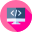 **TODO!**

Connectez votre client mongodb à votre service mongodb en localhost. Puis créez la base de données `but3` et sa collection `pokemons`.

💡 Astuces :
- La documentation de pymongo : https://pymongo.readthedocs.io/en/stable/genindex.html

In [4]:
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client['but3']
pokemons_coll = db['pokemons']

#### 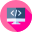 **TODO!**

Insérez-y directement la liste des pokemons (représentés chacun par un dictionnaire -- l'orientation `records`).

💡 Astuces :
- n'oubliez pas de récupérer le résultat de l'insertion


In [5]:
insert_result = pokemons_coll.insert_many(records)
print(insert_result) 



InsertManyResult([ObjectId('68df840e4eaf5ee5df554b45'), ObjectId('68df840e4eaf5ee5df554b46'), ObjectId('68df840e4eaf5ee5df554b47'), ObjectId('68df840e4eaf5ee5df554b48'), ObjectId('68df840e4eaf5ee5df554b49'), ObjectId('68df840e4eaf5ee5df554b4a'), ObjectId('68df840e4eaf5ee5df554b4b'), ObjectId('68df840e4eaf5ee5df554b4c'), ObjectId('68df840e4eaf5ee5df554b4d'), ObjectId('68df840e4eaf5ee5df554b4e'), ObjectId('68df840e4eaf5ee5df554b4f'), ObjectId('68df840e4eaf5ee5df554b50'), ObjectId('68df840e4eaf5ee5df554b51'), ObjectId('68df840e4eaf5ee5df554b52'), ObjectId('68df840e4eaf5ee5df554b53'), ObjectId('68df840e4eaf5ee5df554b54'), ObjectId('68df840e4eaf5ee5df554b55'), ObjectId('68df840e4eaf5ee5df554b56'), ObjectId('68df840e4eaf5ee5df554b57'), ObjectId('68df840e4eaf5ee5df554b58'), ObjectId('68df840e4eaf5ee5df554b59'), ObjectId('68df840e4eaf5ee5df554b5a'), ObjectId('68df840e4eaf5ee5df554b5b'), ObjectId('68df840e4eaf5ee5df554b5c'), ObjectId('68df840e4eaf5ee5df554b5d'), ObjectId('68df840e4eaf5ee5df554b

In [6]:
# la récupération d'un élément dans une collection donne un cursor (un itérable)
print(pokemons_coll.find())

#### 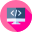 **TODO!**

Affichons le cursor sous forme de liste issue de la collection. Désormais, les éléments ont un _id qui est un objet instancié (qui peut être mis mauellement lors de l'insertion), donc pas serializable dans un JSON normal 😉

💡 Astuces :
- la méthode `.to_list()` peut être pratique

In [39]:
print(pokemons_coll.find().to_list)


<bound method Cursor.to_list of <pymongo.synchronous.cursor.Cursor object at 0x736f9a775ac0>>


#### 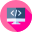 **TODO!**

Affichez le premier élément

In [31]:
premier_elem = pokemons_coll.find_one()
print(premier_elem)



{'_id': ObjectId('68df81ec4d0e0962dd53c6fc'), 'Number': 1, 'Name': 'Bulbasaur', 'Type_1': 'Grass', 'Type_2': 'Poison', 'Total': 318, 'HP': 45, 'Attack': 49, 'Defense': 49, 'Sp_Atk': 65, 'Sp_Def': 65, 'Speed': 45, 'Generation': 1, 'isLegendary': False, 'Color': 'Green', 'hasGender': True, 'Pr_Male': 0.875, 'Egg_Group_1': 'Monster', 'Egg_Group_2': 'Grass', 'hasMegaEvolution': False, 'Height_m': 0.71, 'Weight_kg': 6.9, 'Catch_Rate': 45, 'Body_Style': 'quadruped'}


#### 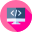 **TODO!**

Affichez l'identifiant du premier élément de la collection.

Qu'est-ce que cet identifiant ? De quel type est-il ?

In [23]:
print(premier_elem['_id'], type(premier_elem['_id']))

68df81ec4d0e0962dd53c6fc <class 'bson.objectid.ObjectId'>


#### 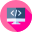 **TODO!**

Affichez le numéro du pokémon le plus mignon de l'univers.... carapuce !

<img height="100px" src="https://www.pokepedia.fr/images/thumb/c/cc/Carapuce-RFVF.png/800px-Carapuce-RFVF.png">

💡Astuce :
- `find_one()` et `find()` acceptent des arguments 😉

In [25]:
carapuce = pokemons_coll.find_one({'Name': 'Squirtle'})
print(carapuce['Number'])


7


#### 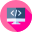 **TODO!**

Affichez désormais uniquement les noms des pokemons avec leur premier type, un par ligne, en excluant l'id

In [29]:
for pokemon in pokemons_coll.find({}, {'_id': 0, 'Name': 1, 'Type_1': 1}):
    print(pokemon['Name'], pokemon['Type_1'])



Bulbasaur Grass
Ivysaur Grass
Venusaur Grass
Charmander Fire
Charmeleon Fire
Charizard Fire
Squirtle Water
Wartortle Water
Blastoise Water
Caterpie Bug
Metapod Bug
Butterfree Bug
Weedle Bug
Kakuna Bug
Beedrill Bug
Pidgey Normal
Pidgeotto Normal
Pidgeot Normal
Rattata Normal
Raticate Normal
Spearow Normal
Fearow Normal
Ekans Poison
Arbok Poison
Pikachu Electric
Raichu Electric
Sandshrew Ground
Sandslash Ground
Nidoran♀ Poison
Nidorina Poison
Nidoqueen Poison
Nidoran♂ Poison
Nidorino Poison
Nidoking Poison
Clefairy Fairy
Clefable Fairy
Vulpix Fire
Ninetales Fire
Jigglypuff Normal
Wigglytuff Normal
Zubat Poison
Golbat Poison
Oddish Grass
Gloom Grass
Vileplume Grass
Paras Bug
Parasect Bug
Venonat Bug
Venomoth Bug
Diglett Ground
Dugtrio Ground
Meowth Normal
Persian Normal
Psyduck Water
Golduck Water
Mankey Fighting
Primeape Fighting
Growlithe Fire
Arcanine Fire
Poliwag Water
Poliwhirl Water
Poliwrath Water
Abra Psychic
Kadabra Psychic
Alakazam Psychic
Machop Fighting
Machoke Fighting
Macham

#### 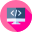 **TODO!**

Combien de pokemons ont un nom commençant par A ?

💡 Astuces :
- vive les expressions régulières

In [33]:
count_a = pokemons_coll.count_documents({'Name': {'$regex': '^A'}})
print(count_a)


99


#### 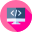 **TODO!**

Afficher le nom des pokemons ayant un nom commençant par A et affichez les séparés par une barre verticale. 

Puis, triez les par ordre alphabétique avec python et affichez-les.

Enfin, triez les par ordre alphabétique de nouveau mais à l'aide de mongodb (donc directement lors de la requête).

💡 Astuces :
- vous pourriez avoir besoin de `list comprehension` et autres astuces pratiques de python

### Avec Python

In [37]:

names_a = [p['Name'] for p in pokemons_coll.find({'Name': {'$regex': '^A'}}, {'Name': 1, '_id': 0})]
print(' | '.join(sorted(names_a)))


Abomasnow | Abomasnow | Abomasnow | Abra | Abra | Abra | Absol | Absol | Absol | Accelgor | Accelgor | Accelgor | Aegislash | Aegislash | Aegislash | Aerodactyl | Aerodactyl | Aerodactyl | Aggron | Aggron | Aggron | Aipom | Aipom | Aipom | Alakazam | Alakazam | Alakazam | Alomomola | Alomomola | Alomomola | Altaria | Altaria | Altaria | Amaura | Amaura | Amaura | Ambipom | Ambipom | Ambipom | Amoonguss | Amoonguss | Amoonguss | Ampharos | Ampharos | Ampharos | Anorith | Anorith | Anorith | Arbok | Arbok | Arbok | Arcanine | Arcanine | Arcanine | Arceus | Arceus | Arceus | Archen | Archen | Archen | Archeops | Archeops | Archeops | Ariados | Ariados | Ariados | Armaldo | Armaldo | Armaldo | Aromatisse | Aromatisse | Aromatisse | Aron | Aron | Aron | Articuno | Articuno | Articuno | Audino | Audino | Audino | Aurorus | Aurorus | Aurorus | Avalugg | Avalugg | Avalugg | Axew | Axew | Axew | Azelf | Azelf | Azelf | Azumarill | Azumarill | Azumarill | Azurill | Azurill | Azurill


### Avec MongoDB

In [38]:
for p in pokemons_coll.find({'Name': {'$regex': '^A'}}, {'Name': 1, '_id': 0}).sort('Name', 1):
    print(p['Name'])

Abomasnow
Abomasnow
Abomasnow
Abra
Abra
Abra
Absol
Absol
Absol
Accelgor
Accelgor
Accelgor
Aegislash
Aegislash
Aegislash
Aerodactyl
Aerodactyl
Aerodactyl
Aggron
Aggron
Aggron
Aipom
Aipom
Aipom
Alakazam
Alakazam
Alakazam
Alomomola
Alomomola
Alomomola
Altaria
Altaria
Altaria
Amaura
Amaura
Amaura
Ambipom
Ambipom
Ambipom
Amoonguss
Amoonguss
Amoonguss
Ampharos
Ampharos
Ampharos
Anorith
Anorith
Anorith
Arbok
Arbok
Arbok
Arcanine
Arcanine
Arcanine
Arceus
Arceus
Arceus
Archen
Archen
Archen
Archeops
Archeops
Archeops
Ariados
Ariados
Ariados
Armaldo
Armaldo
Armaldo
Aromatisse
Aromatisse
Aromatisse
Aron
Aron
Aron
Articuno
Articuno
Articuno
Audino
Audino
Audino
Aurorus
Aurorus
Aurorus
Avalugg
Avalugg
Avalugg
Axew
Axew
Axew
Azelf
Azelf
Azelf
Azumarill
Azumarill
Azumarill
Azurill
Azurill
Azurill


#### 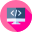 **TODO!**

Affichez un dict pour représenter les données par type principal du pokemon, puis créez une collection par type

In [49]:

par_type = {}
for pokemon in pokemons_coll.find():
    type = pokemon['Type_1']
    if type not in par_type:
        par_type[type] = []
    par_type[type].append(pokemon)

for type, pokes in par_type.items():
    for poke in pokes:
        if '_id' in poke:
            del poke['_id']
    db[t.lower()].insert_many(pokes)




#### 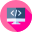 **TODO!**

Supprimez les informations du pokemon de votre choix, puis supprimez un pokemon au hasard

In [50]:
pokemons_coll.delete_one({'Name': 'Squirtle'})


DeleteResult({'n': 1, 'ok': 1.0}, acknowledged=True)

In [53]:
from random import choice

tout_pokemons = [p['_id'] for p in pokemons_coll.find({}, {'_id': 1})]
random_id = choice(tout_pokemons)
pokemons_coll.delete_one({'_id': random_id})

DeleteResult({'n': 1, 'ok': 1.0}, acknowledged=True)

#### 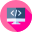 **TODO!**

Affichez les noms de chaque type1, séparés par un espace, à partir des collections de type1

In [55]:
for type in db.list_collection_names():
    if type != 'pokemons':
        print(type, end=' ')



steel rock poison bug water dragon fairy fighting grass electric ice psychic normal fire dark flying ghost ground 

Et voilà~ ! Vous avez appris à utiliser MongoDB pour les opérations basiques :
- Create
- Read
- Update
- Delete

donc le CRUD 😃